In [1]:
data_path = '../../../data/'

In [2]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
from jupyterthemes import jtplot

C:\Users\nikitosoleil\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
jtplot.style('gruvboxd')

In [4]:
ans = pd.read_csv(data_path + 'answers.csv')
que = pd.read_csv(data_path + 'questions.csv')

In [5]:
stopwords = stopwords.words('english')

In [6]:
ps = PorterStemmer()
stemmed = dict()

In [7]:
def process_text(text: str):
    ret = []
    for word in word_tokenize(str(text).lower()):
        if word.isalpha() and word not in stopwords:
            if word not in stemmed:
                stemmed[word] = ps.stem(word)
            ret.append(stemmed[word])
    return ret

In [8]:
ans['answers_body'] = ans['answers_body'].apply(process_text)

In [9]:
que['questions_title'] = que['questions_title'].apply(process_text)
que['questions_body'] = que['questions_body'].apply(process_text)

In [10]:
ans_que = ans.merge(que, left_on = "answers_question_id", right_on = "questions_id")

In [11]:
ans_que

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,"[p, hi, p, ask, interest, question, give, two,...",332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,"[teacher, career, question]","[math, teacher, math, teacher, use, colleg, pr..."
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,"[p, hi, join, armi, attend, colleg, receiv, ba...",eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,"[want, becom, armi, offic, becom, armi, offic]","[priyanka, bangalor, std, go, colleg, get, con..."
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"[p, dear, priyanka, p, greet, answer, question...",eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,"[want, becom, armi, offic, becom, armi, offic]","[priyanka, bangalor, std, go, colleg, get, con..."
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47 UTC+0000,"[p, work, global, compani, valu, highli, inter...",4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,"[go, abroad, first, job, increas, chanc, job, ...","[plan, go, abroad, first, job, teach, job, ser..."
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33 UTC+0000,"[agre, denis, everi, singl, job, sinc, first, ...",2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,"[becom, specialist, busi, manag, network]","[hear, busi, manag, hard, way, get, job, known..."
5,5f62fadae80748c7907e3b0551bf4203,b03c3872daeb4a5cb1d8cd510942f0c4,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-12 16:01:44 UTC+0000,"[network, key, compon, progress, career, work,...",2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,"[becom, specialist, busi, manag, network]","[hear, busi, manag, hard, way, get, job, known..."
6,1d804b3b9e764cdd90195fb138d1a5aa,f6c89fde797d45938bce3531f55c9b6b,5af8880460c141dbb02971a1a8369529,2017-09-29 18:50:11 UTC+0000,"[http, check, websit, allow, search, scholarsh...",5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,"[scholarship, student, first, gener, live, ga]","[tri, find, scholarship, first, year, student,..."
7,08d3cf6fa20543ddbdc42f70a7bcae9e,5bc2db4d58584f95bdba30ed2c21d573,5af8880460c141dbb02971a1a8369529,2018-06-08 02:39:02 UTC+0000,"[p, hi, jocelyn, p, br, p, may, recommend, fre...",5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,"[scholarship, student, first, gener, live, ga]","[tri, find, scholarship, first, year, student,..."
8,9d33d099a03c44328fbf166aad585f63,8136c8653d3a4895b49cac90b88120d2,7c336403258f4da3a2e0955742c76462,2017-03-01 16:52:43 UTC+0000,"[p, typic, schedul, take, four, year, receiv, ...",7c336403258f4da3a2e0955742c76462,d1e4587c0e784c62bc27eb8d16a07f38,2017-03-01 04:27:08 UTC+0000,"[mani, year, coeg, need, engin]",[engin]
9,228e5feefb4e42188b7c48a5c7eb3aa8,35c8d979b56647839c8df0f0383648cd,be3c5edfdb07423e955e9b2d7f186bce,2017-10-13 18:08:20 UTC+0000,"[cours, know, someon, doubl, classic, languag,...",be3c5edfdb07423e955e9b2d7f186bce,71b4554d4a824253aa28287372c55797,2017-09-01 04:59:38 UTC+0000,"[want, becom, doctor, great, interest, scienc,...","[musician, want, pursu, colleg, well, want, lo..."


In [12]:
prof = pd.read_csv(data_path + 'professionals.csv')

In [13]:
prof['professionals_industry'] = prof['professionals_industry'].apply(process_text)
prof['professionals_industry'] = prof['professionals_industry'].apply(lambda x: ' '.join((x + ['', ''])[:3]))

In [14]:
merged = ans_que.merge(prof, left_on = 'answers_author_id', right_on = 'professionals_id')

In [25]:
considerable = set(merged.professionals_industry.value_counts().where(lambda x: x>0).dropna().index)

In [26]:
len(considerable)

942

In [27]:
filtered = merged[merged.professionals_industry.isin(considerable)]

In [28]:
filtered

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,"[p, hi, p, ask, interest, question, give, two,...",332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,"[teacher, career, question]","[math, teacher, math, teacher, use, colleg, pr...",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
1,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,"[p, hi, rodrigo, p, import, thing, rememb, go,...",0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,"[kind, colleg, could, go, soccer, player]","[like, soccer, play, sens, year, old, soccer, ...",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
2,825f6e316a5f48328d6f8af831df9940,36ff3b3666df400f956f8335cf53e09e,0149c6d63e214040b44d4a3789bb00ba,2018-04-15 23:08:46 UTC+0000,"[p, congratul, interest, find, right, career, ...",0149c6d63e214040b44d4a3789bb00ba,34217a1861d640a58c85e033414cf9cb,2018-04-12 17:13:45 UTC+0000,"[best, way, prepar, studi, engin, graduat, sch...","[interest, comput, neurosci, hope, studi, eith...",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
3,f3fc23809cda472780fc565334f35000,36ff3b3666df400f956f8335cf53e09e,acc611cfb5c44daa8a3d7d65dfffa5ff,2018-08-14 10:37:01 UTC+0000,"[p, import, thing, get, know, well, enough, de...",acc611cfb5c44daa8a3d7d65dfffa5ff,5b751a8ee4a047f7a08ce9eb5e43e5a2,2018-08-14 04:49:33 UTC+0000,"[prepar, job, search, go, senior, year, colleg]","[sociolog, polit, scienc, intern, studi, major...",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
4,7410001e9a2f46df982cba38ba60486a,36ff3b3666df400f956f8335cf53e09e,b44409c0c83a43578f4f2d0a0e4d8ead,2016-12-08 02:26:05 UTC+0000,"[p, hi, alexandra, p, site, profession, organ,...",b44409c0c83a43578f4f2d0a0e4d8ead,2fe767de78fa4dfd83f0021cf7712064,2016-12-07 20:43:41 UTC+0000,"[major, recommend, order, ethnomusicologist]","[current, enrol, world, music, class, univers,...",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
5,8961104db49b42e6882661724543b565,36ff3b3666df400f956f8335cf53e09e,27653986401c4a8388d03cfa28acf5b4,2016-10-20 21:47:01 UTC+0000,"[p, hi, christoph, p, ask, good, question, luc...",27653986401c4a8388d03cfa28acf5b4,b5bd31ccef2d4a4fa638dd931a0e6cc9,2016-10-20 19:28:36 UTC+0000,"[much, opportun, stem, major, entertain, indus...","[question, regard, potenti, find, employ, indu...",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
6,d29c121eb71b43a3a338008353559bdd,36ff3b3666df400f956f8335cf53e09e,7017565a7f0141dbb47a3445ed128e34,2018-10-05 13:58:37 UTC+0000,"[p, use, process, present, increas, chanc, lan...",7017565a7f0141dbb47a3445ed128e34,a180b2b6ef444a0dbc6adf740fe8c12c,2018-10-05 13:28:50 UTC+0000,"[find, job, career, field, colleg]","[colleg, job]",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
7,ba25ed162f2e46deb1f022372c84c9c7,36ff3b3666df400f956f8335cf53e09e,3c64129b6a3f4728adabeecf23afdea2,2018-

In [29]:
prepared = [TaggedDocument(row.answers_body, [row.professionals_industry]) for i, row in filtered.iterrows()]

In [30]:
d2v = Doc2Vec(prepared, vector_size = 10, workers = 4, iter = 20, dm = 0)

C:\Users\nikitosoleil\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")


In [31]:
proj = TSNE(n_components = 2, verbose = 1).fit_transform(d2v.docvecs.vectors_docs)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 942 samples in 0.001s...
[t-SNE] Computed neighbors for 942 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 942 / 942
[t-SNE] Mean sigma: 0.591512
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.271034
[t-SNE] KL divergence after 1000 iterations: 1.479024


In [32]:
d2v.docvecs.vectors_docs.shape

(942, 10)

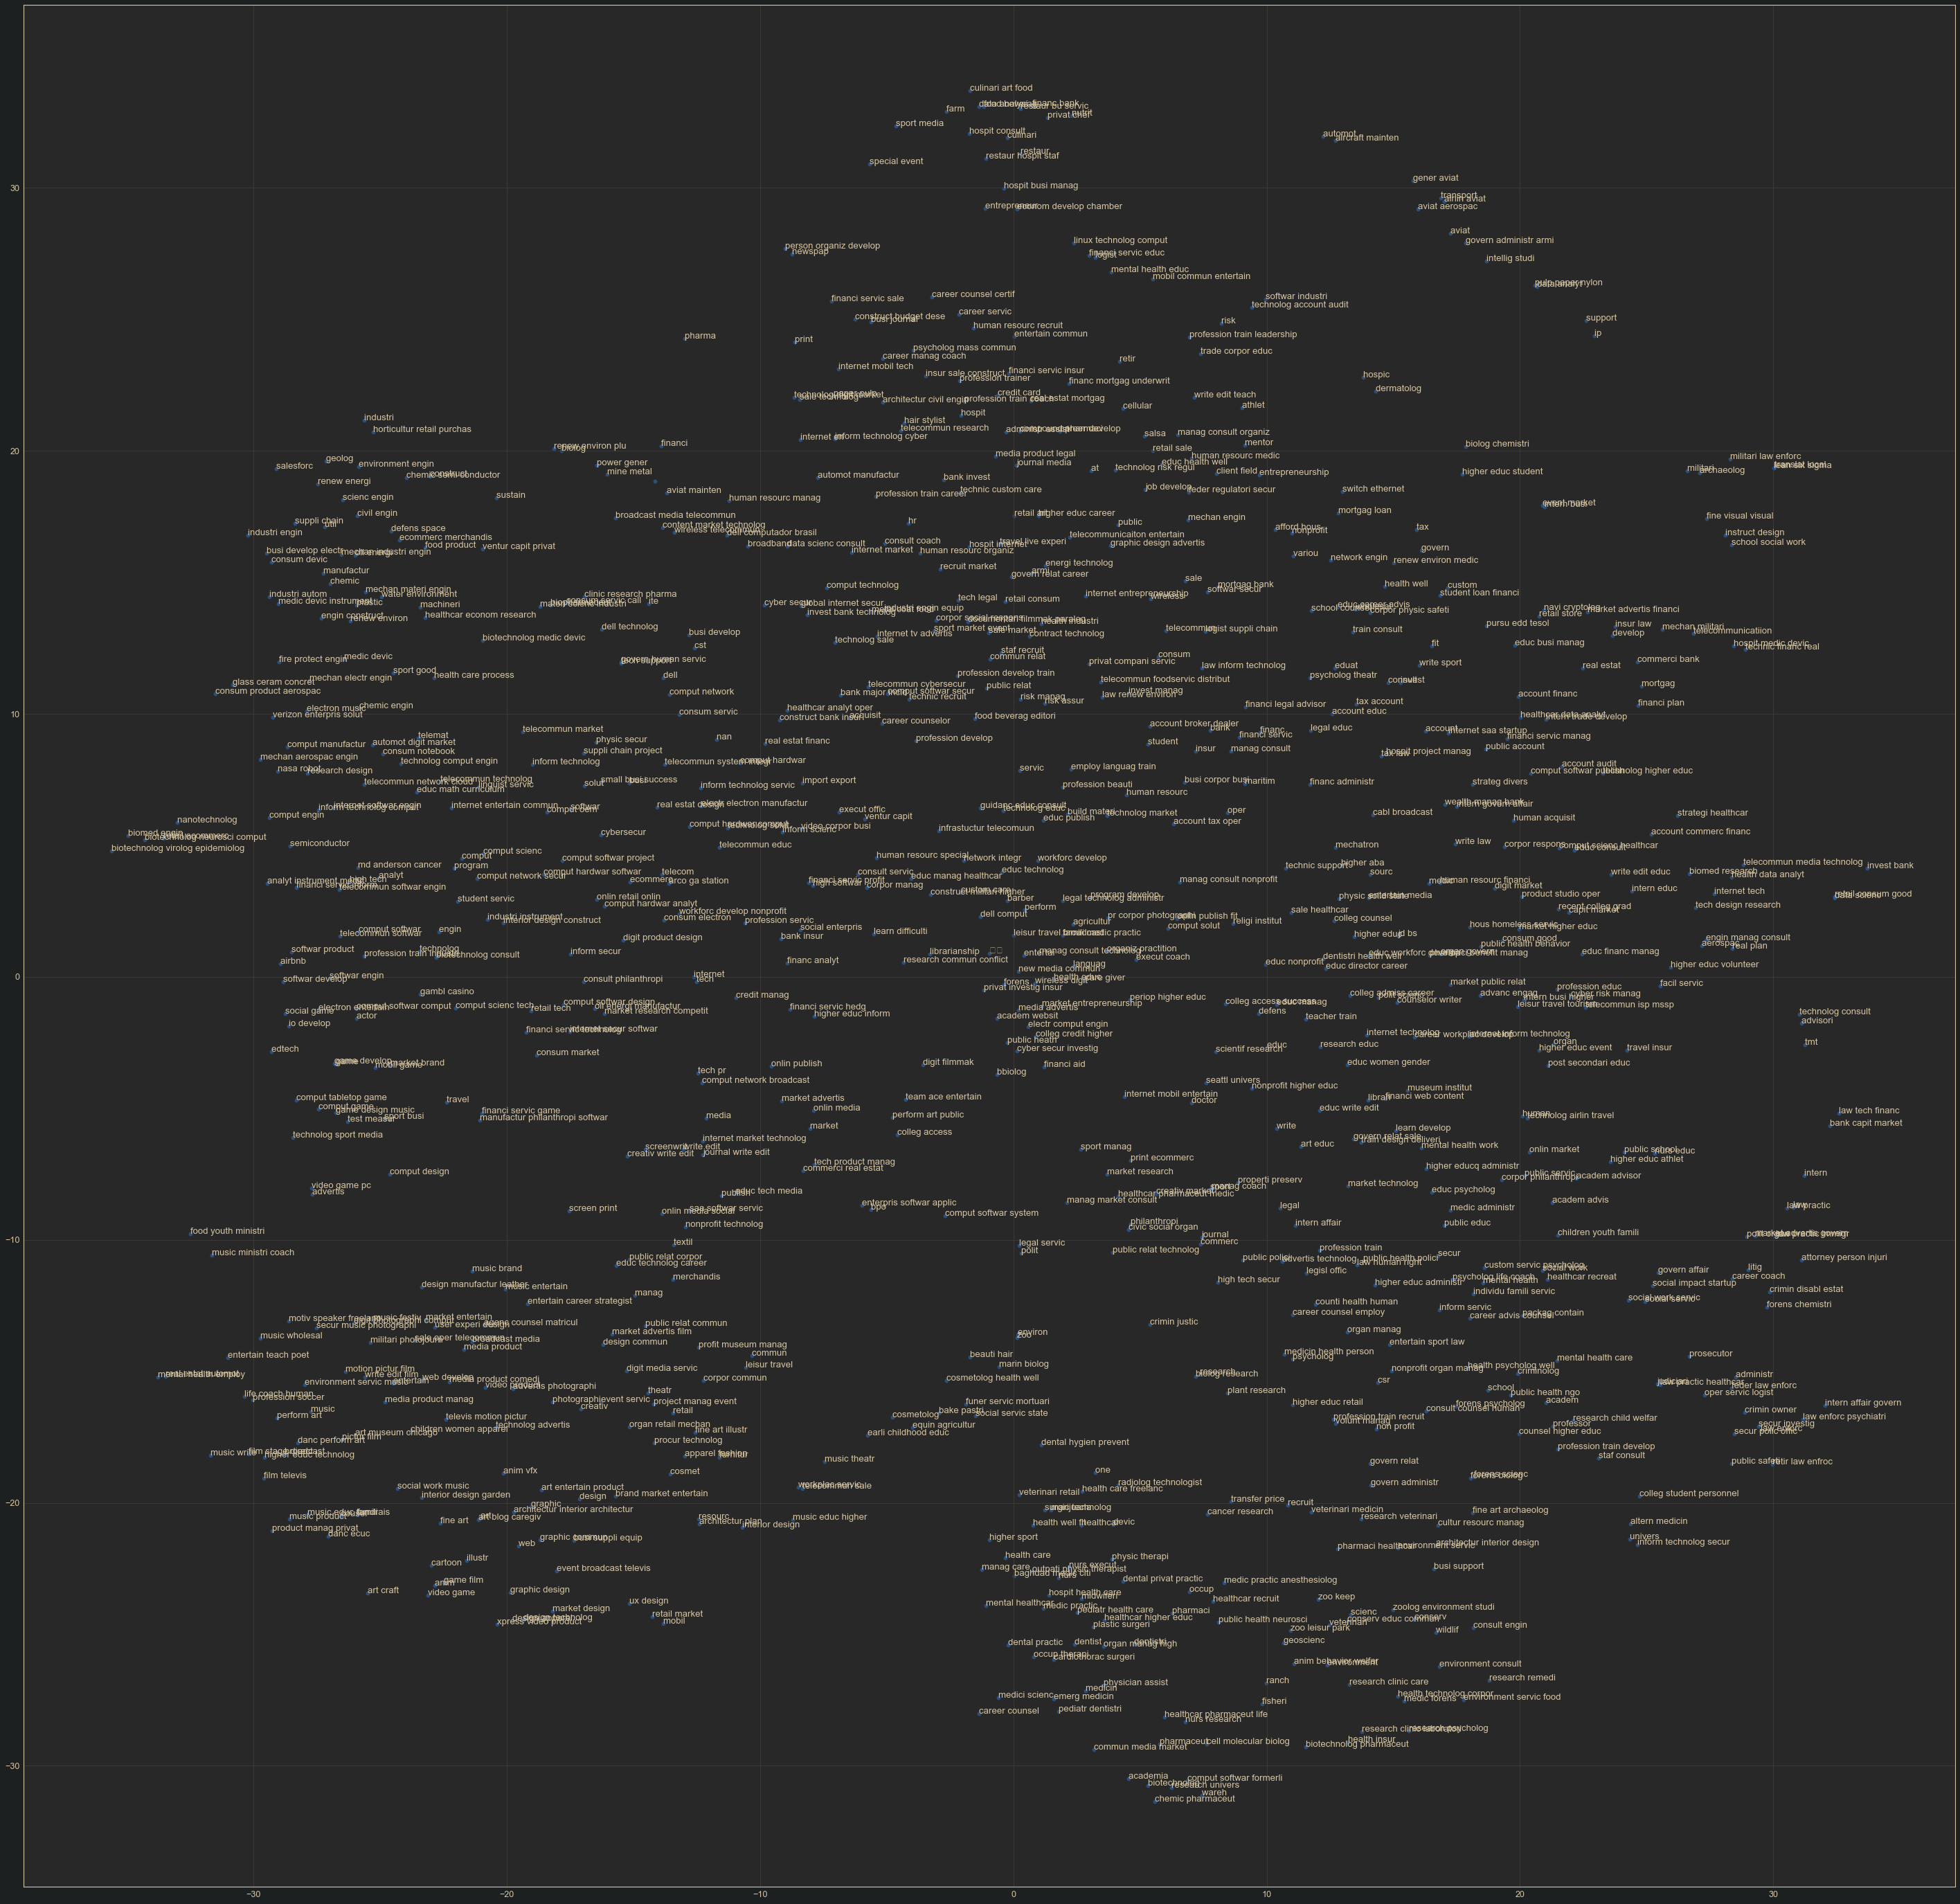

In [33]:
fig, ax = plt.subplots(figsize = (50, 50))

plt.scatter(proj[:, 0], proj[:, 1], alpha = 0.5)

for i, name in tqdm(enumerate(d2v.docvecs.index2entity)):
    ax.annotate(name, (proj[i, 0], proj[i, 1]))

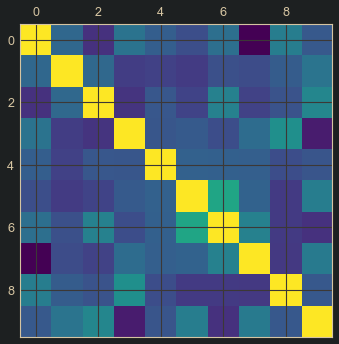

In [34]:
plt.matshow(pd.DataFrame(d2v.docvecs.vectors_docs).corr())

In [35]:
pd.DataFrame(d2v.docvecs.vectors_docs).corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.101196,-0.157593,0.161223,0.050933,-0.025248,0.142184,-0.351791,0.220535,0.025304
1,0.101196,1.000000,0.106771,-0.107522,-0.090787,-0.116082,-0.019575,-0.036993,0.042048,0.166700
2,-0.157593,0.106771,1.000000,-0.149539,0.016066,-0.081702,0.240609,-0.082976,-0.007393,0.268295
3,0.161223,-0.107522,-0.149539,1.000000,0.010857,0.030429,-0.031071,0.127832,0.321430,-0.250988
4,0.050933,-0.090787,0.016066,0.010857,1.000000,0.068211,0.060142,0.055318,-0.034878,0.004071
5,-0.025248,-0.116082,-0.081702,0.030429,0.068211,1.000000,0.445536,0.074299,-0.122776,0.222181
6,0.142184,-0.019575,0.240609,-0.031071,0.060142,0.445536,1.000000,0.241241,-0.122160,-0.157502
7,-0.351791,-0.036993,-0.082976,0.127832,0.055318,0.074299,0.241241,1.000000,-0.129314,0.204269
8,0.220535,0.042048,-0.007393,0.321430,-0.034878,-0.122776,-0.122160,-0.129314,1.000000,0.022054
9,0.025304,0.166700,0.268295,-0.250988,0.004071,0.222181,-0.157502,0.204269,0.022054,1.000000
